Import 

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Framing the Problem

The aim of this lab is to use univariate linear regression to study the California Housing Prices data. Our model will use median income, population and the number of households to guess the median house value. We want to know which feature gives the strongest prediction of median house value by examining linear regression metrics.


#  Getting the Data


In [17]:

file_path = "Data/housing.csv"
df = pd.read_csv(file_path)
df.head()



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Dataset Source: [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices)


## Exploratory Data Analysis (EDA)



In [29]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Scatter Plots


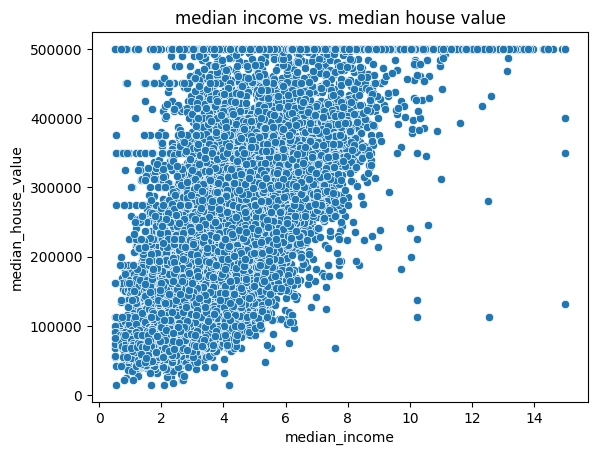

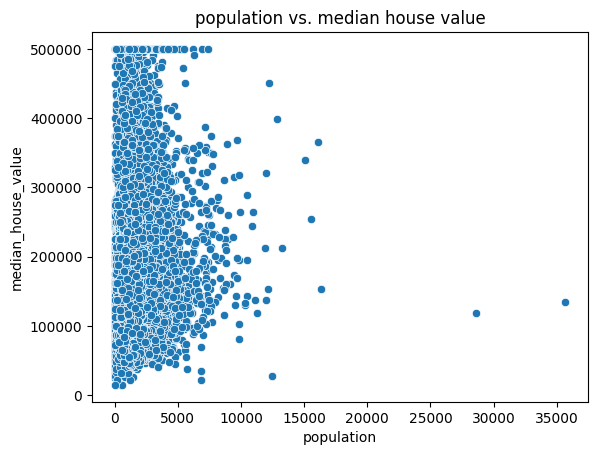

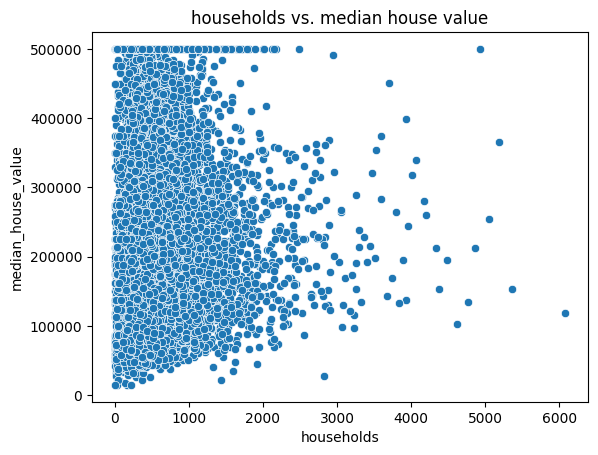

In [33]:
# From Scatter Plot 1 
sns.scatterplot(data=df, x="median_income", y="median_house_value").set_title("median income vs. median house value")
plt.show()

# From Scatter Plot 2
sns.scatterplot(data=df, x="population", y="median_house_value").set_title("population vs. median house value")
plt.show()

# From Scatter Plot 3
sns.scatterplot(data=df, x="households", y="median_house_value").set_title("households vs. median house value")
plt.show()

### From the scatter plots:
- **Median Income** is highly linked to higher house values.
- **Population** The relationship between habitat and population is weak and disperse.
- **Households** There is a moderate amount of correlation between households and the rest of the series, yet the readings are not very precise.

### Description of Variables:
- `median_income`: The average income that is expect in a block (between about 0.5 and 15)
- `population`: The total population in the block.
- `households`: How many households are living in the block.
- `median_house_value`: Our goal is to model the cost of a house which we call the price of house.

#### Linear Regression Modeling


In [31]:


def run_regression(X, y):
    model = LinearRegression()
    model.fit(X, y)
    preds = model.predict(X)
    mse = mean_squared_error(y, preds)
    mae = mean_absolute_error(y, preds)
    return model.intercept_, model.coef_[0], mse, mae, preds

features = ['median_income', 'population', 'households']
results = []

for feature in features:
    X = df[[feature]]
    y = df['median_house_value']
    intercept, slope, mse, mae, preds = run_regression(X, y)
    results.append((feature, intercept, slope, mse, mae))

results_df = pd.DataFrame(results, columns=['Feature', 'Intercept', 'Slope', 'MSE', 'MAE'])
results_df


,Feature,Intercept,Slope,MSE,MAE
0,median_income,45085.576703,41793.849202,7.011312e+09,62625.933791
1,population,210436.262076,-2.511753,1.330741e+10,91153.820095
2,households,196928.577162,19.872775,1.325778e+10,90802.743243


### Plot Lines on Top of Scatter Plots


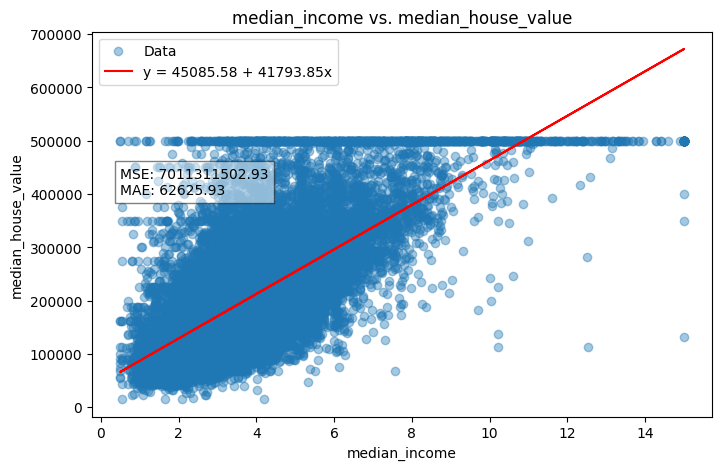

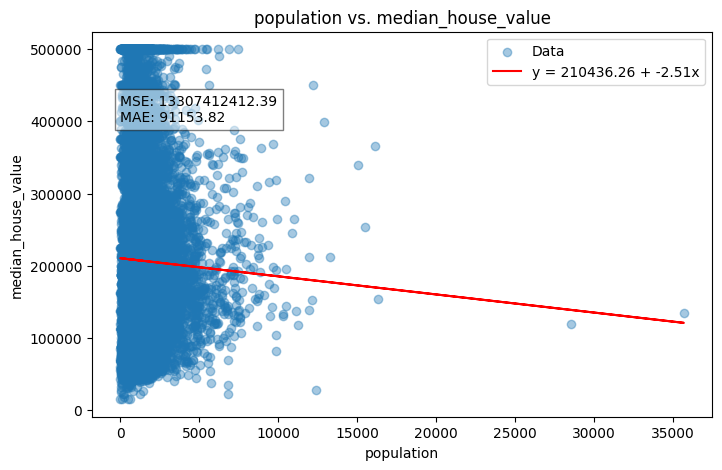

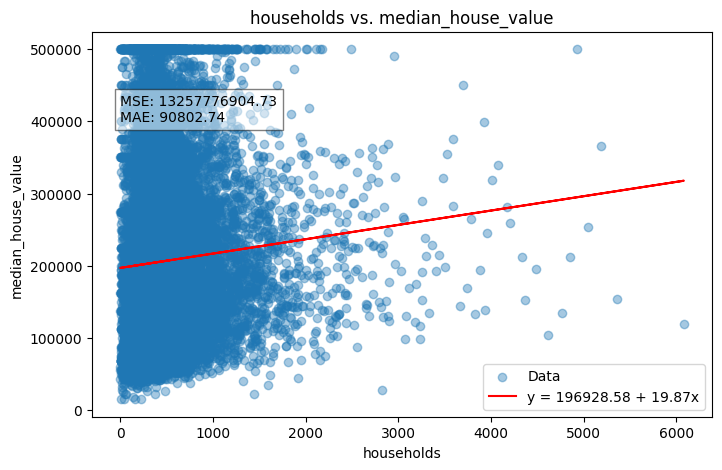

In [32]:
def plot_with_regression(x, y, intercept, slope, title, mse, mae):
    plt.figure(figsize=(8,5))
    plt.scatter(x, y, alpha=0.4, label="Data")
    plt.plot(x, intercept + slope * x, color="red", label=f"y = {intercept:.2f} + {slope:.2f}x")
    plt.title(title)
    plt.xlabel(x.name)
    plt.ylabel("median_house_value")
    plt.text(x.min(), y.max()*0.8, f"MSE: {mse:.2f}\nMAE: {mae:.2f}", fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
    plt.legend()
    plt.show()

for feature, intercept, slope, mse, mae in results:
    plot_with_regression(df[feature], df["median_house_value"], intercept, slope,
                         f"{feature} vs. median_house_value", mse, mae)


###  Summary and Recommendations

## Summary


## Summary
- Median Income had the smallest MSE and MAE, thus it is a good indicator for our model.
- Population showed the weakest relationship and least effective model fit.
- Household counts were better than the population count but lagged behind income values.

## Recommendation

The choice for one variable to estimate house value should be median income, as it gives the strongest linear relationship and records the least errors.

## Publishing the Notebook

